In [ ]:
doc_ls = ['바나나 사과 포도 포도',
         '사과 포도',
         '포도 바나나',
         '짜장면 짬뽕 탕수육',
         '볶음밥 탕수육',
         '짜장면 짬뽕',
         '라면 스시',
         '스시',
         '가츠동 스시 소바',
         '된장찌개 김치찌개 김치',
         '김치 된장',
         '비빔밥 김치']

In [ ]:
import pandas as pd
tokenized_doc = pd.Series([i.split() for i in doc_ls])
tokenized_doc

In [ ]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]

In [ ]:
dictionary

In [ ]:
corpus

In [ ]:
import gensim
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 4, id2word = dictionary, passes=5)

topics = ldamodel.print_topics(num_words=3)
for topic in topics:
    print(topic)

In [ ]:
import pandas as pd
news =pd.read_csv('./data/news_data/news_sample_ngram_ver4.csv',encoding = 'utf-8',lineterminator='\n')
news.head()

news = news.dropna()
news = news.reset_index()
del news['index']

In [ ]:
new_doc_ls = news['trigram'].to_list()
import KimModule.Topic_Modeling_LDA_TDM as kim
DF =kim.Topic_LDA_TDM(new_doc_ls)
df = DF.LDA_TDM()
df

In [ ]:
new_doc_ls = news['trigram'].to_list()
import KimModule.Topic_Modeling_LDA_TF_IDF as kim
DF =kim.Topic_LDA_TF_IDF(new_doc_ls)
df = DF.LDA_TF_IDF()
df

In [ ]:
new_doc_ls = news['fivegram'].to_list()
import KimModule.Topic_Modeling_LDA_TDM as kim
DF =kim.Topic_LDA_TDM(new_doc_ls)
df = DF.LDA_TDM()
df

In [ ]:
new_doc_ls = news['fivegram'].to_list()
import KimModule.Topic_Modeling_LDA_TF_IDF as kim
DF =kim.Topic_LDA_TF_IDF(new_doc_ls)
df = DF.LDA_TF_IDF()
df

In [ ]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import TfidfModel

news_doc_ls = news['fivegram'].to_list()
news_doc = [doc.split(',') for doc in news_doc_ls]
dictionary = corpora.Dictionary(news_doc)
corpus = [dictionary.doc2bow(text) for text in news_doc]
tfidf_model = TfidfModel(corpus)
corpus = tfidf_model[corpus]
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word = dictionary, passes=5)
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

참고 : 

perplexity_values는 확률 모델이 표본을 얼마나 잘 예측하는지에 대한 통계적 측정 값. 
       
주어진 k 값에 대해 LDA에 적용될 때 LDA 모형을 추정한다. 
       

In [1]:
import pandas as pd
news =pd.read_csv('./data/news_data/news_samgsung_skhinix_ngram.csv',encoding = 'utf-8',lineterminator='\n')
news.head()

news = news.dropna()
news = news.reset_index()
del news['index']

In [2]:
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import TfidfModel
news_doc_ls = news['fivegram'].to_list()


C:\Users\khjin\.conda\envs\jin\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
def Topic_Num_Decision(news_doc_ls, start, stop, size):
    
    model_list = []
    coherence_values = []
    topic_n_list = []
    perplexity_values = []
    news_doc = [doc.split(',') for doc in news_doc_ls]
    #dic = corpora.Dictionary(news_doc)
    dictionary = corpora.Dictionary(news_doc)
    corpus = [dictionary.doc2bow(text) for text in news_doc]
    tfidf_model = TfidfModel(corpus)
    corpus = tfidf_model[corpus]

    for num_topics in range(start, stop, size):
        model = LdaModel(corpus, num_topics=num_topics, id2word = dictionary)
        model_list.append(model)

        coherencemodel = CoherenceModel(model=model, texts=news_doc, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        topic_n_list.append(num_topics)
        perplexity_values.append(model.log_perplexity(corpus))
    return model_list, coherence_values, perplexity_values
        
        


In [ ]:
model_list, coherence_values, perplexity_values = Topic_Num_Decision(news_doc_ls,5,21,5)

In [ ]:
model_list, coherence_values, perplexity_values

In [6]:
import matplotlib.pyplot as plt
def Topic_Num_Decision_Plt(news_doc_ls, start, stop, size):
    
    model_list, coherence_values, perplexity_values = Topic_Num_Decision(news_doc_ls, start, stop, size)
    x = range(start, stop, size)
    fig, ax1 = plt.subplots()
    color = 'tab:blue'
    ax1.set_xlabel("Number of Topics")
    ax1.set_ylabel("Coherence score", color=color)
    ax1.plot(x, coherence_values, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:red'
    ax2.set_ylabel('Perplexity score', color=color)  # we already handled the x-label with ax1
    ax2.plot(x, perplexity_values, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

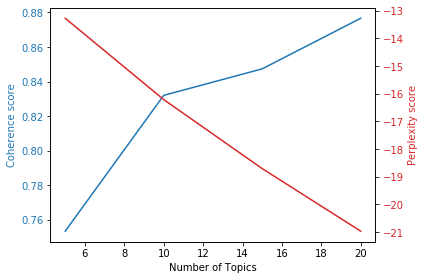

In [9]:
Topic_Num_Decision_Plt(news_doc_ls, 5, 21, 5)

In [11]:
import pandas as pd
news =pd.read_csv('./data/news_data/news_samgsung_skhinix_ngram.csv',encoding = 'utf-8',lineterminator='\n')

news = news.dropna()
news = news.reset_index()
del news['index']
len(news)

48869

In [2]:
news.head(1)

,Unnamed: 0,Unnamed: 0.1,type,date,media,title,content,url,tokens,bigram,trigram,fourgram,fivegram,ngram
0,0,0,news,2019-08-31 20:01:00,서울일보,판깨스트 국정농단 상고심박근혜 2심 김문석 vs 이재용 2심 정형식 판결 재조명,박근혜왼쪽 전 대통령과 이재용 삼성전자 부회장. 연합2016년 말 전국에 들불처럼 ...,https://www.seoul.co.kr/news/newsView.php?id=2...,"왼쪽/nng,부회장/nng,연합/nng,전국/nng,들불/nng,촛불/nng,번지/...","왼쪽/nng;부회장/nng,부회장/nng;연합/nng,연합/nng;전국/nng,전국...","왼쪽/nng;부회장/nng;연합/nng,부회장/nng;연합/nng;전국/nng,연합...","왼쪽/nng;부회장/nng;연합/nng;전국/nng,부회장/nng;연합/nng;전국...","왼쪽/nng;부회장/nng;연합/nng;전국/nng;들불/nng,부회장/nng;연합...","왼쪽/nng;부회장/nng,부회장/nng;연합/nng,연합/nng;전국/nng,전국..."


In [12]:
new_doc_ls = news['tokens'].to_list()
import KimModule.Topic_Modeling_LDA_TF_IDF as kim
DF =kim.Topic_LDA_TF_IDF(new_doc_ls)

In [6]:
#model_list, coherence_values, perplexity_values = DF.Topic_Num_Decision(5,21,5)

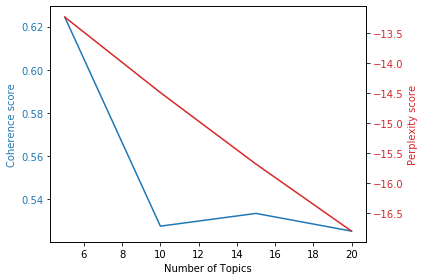

In [13]:
DF.Topic_Num_Decision_Plt(5,21,5)

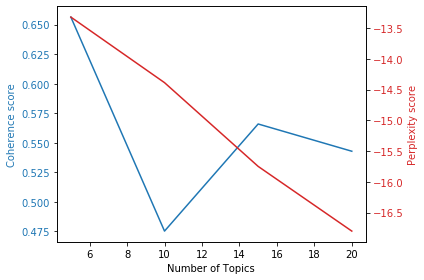

In [14]:
DF.Topic_Num_Decision_Plt(5,21,5)

In [ ]:
new_doc_ls = news['bigram'].to_list()
import KimModule.Topic_Modeling_LDA_TF_IDF as kim
DF2 =kim.Topic_LDA_TF_IDF(new_doc_ls)
DF2.Topic_Num_Decision_Plt(5,21,5)